# Project Tile - Predicting Loan Repayment: Analysis of Lending Data (2007-2010)

# Learnings

Based on the goal of building a model to predict whether a borrower will pay back their loan in full, several insights can be gleaned from the project:

**Credit Policies and FICO Scores**: The analysis revealed that individuals meeting LendingClub.com's credit policy criteria tend to have higher FICO scores compared to those who do not. This indicates that FICO scores play a significant role in determining creditworthiness.

**Debt Payment and FICO Scores:** There is a clear trend showing that individuals with higher FICO scores are more likely to fully pay off their debts. This suggests that FICO scores serve as a reliable indicator of repayment behavior.

**Loan Purposes and Payment Status:** Certain loan purposes, such as debt consolidation and credit card usage, are associated with higher rates of non-payment. Understanding the purpose of the loan can provide valuable insights into repayment probabilities.

**Model Performance Metrics:** The classification reports for decision tree and random forest models highlight the trade-off between precision and recall. While the decision tree achieves higher precision, random forest achieves better recall. The choice between these models depends on the specific priorities of the lending institution.

**Model Evaluation:** The average precision, recall, and F1-score provide a comprehensive evaluation of model performance. These metrics help assess the model's ability to correctly identify borrowers who will fully repay their loans.

**Regarding the models' performance:**

Both models achieved relatively high accuracy scores, with the Random Forest model outperforming the Decision Tree model.

The Decision Tree Model attained an accuracy score of approximately 0.729.

The Random Forest Model achieved a higher accuracy score of approximately 0.846.

# Dataset Description

The dataset contains the following columns:

- `credit.policy`: 1 if the customer meets LendingClub.com's credit underwriting criteria, and 0 otherwise.
- `purpose`: The purpose of the loan, categorized as "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", or "all_other".
- `int.rate`: The interest rate of the loan, represented as a proportion.
- `installment`: The monthly installments owed by the borrower if the loan is funded.
- `log.annual.inc`: The natural log of the borrower's self-reported annual income.
- `dti`: The borrower's debt-to-income ratio.
- `fico`: The borrower's FICO credit score.
- `days.with.cr.line`: The number of days the borrower has had a credit line.
- `revol.bal`: The borrower's revolving balance (unpaid amount at the end of the credit card billing cycle).
- `revol.util`: The borrower's revolving line utilization rate.
- `inq.last.6mths`: The number of inquiries by creditors in the last 6 months.
- `delinq.2yrs`: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- `pub.rec`: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
- `not fully paid`: whether a borrower will pay back their loan in full or not

We'll explore this data to understand patterns and relationships and then build a predictive model based on these features.


# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

Use pandas to read loan_data.csv as a dataframe called loans.

In [ ]:
loans = pd.read_csv('/content/loan_data.csv')

Check out the info(), head(), and describe() methods on loans.

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
loans.groupby('not.fully.paid').count()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
not.fully.paid,,,,,,,,,,,,,
0,8045,8045,8045,8045,8045,8045,8045,8045,8045,8045,8045,8045,8045
1,1533,1533,1533,1533,1533,1533,1533,1533,1533,1533,1533,1533,1533


Data is highly imbalanced

# Exploratory Data Analysis

**Histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**


Text(0.5, 0, 'FICO')

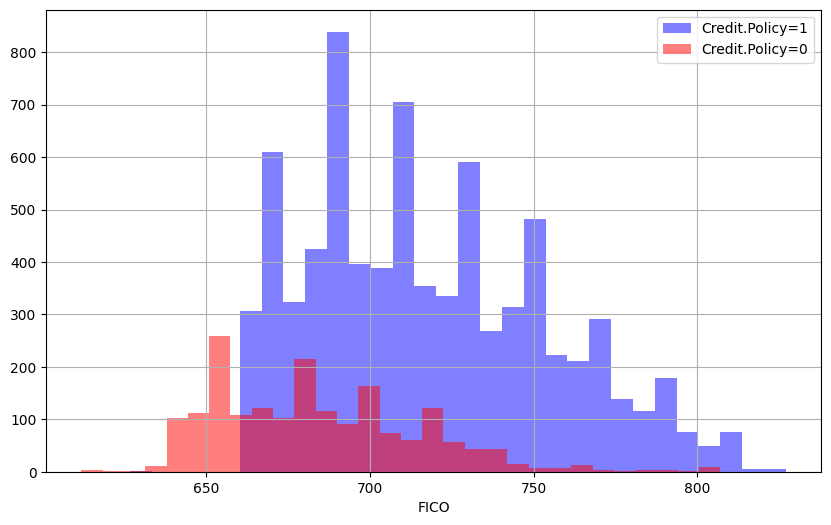

In [ ]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

**1. FICO Scores and Credit Policies:**

The x-axis represents the FICO score, ranging from approximately 600 to 850.

The y-axis represent the count of individuals ranges from 0 to about 900.

There are two sets of data represented by different colors:

Blue: Corresponds to individuals with Credit Policy=1.

Red: Corresponds to individuals with Credit Policy=0.

**2. Distribution Insights:**

Most individuals with Credit Policy=0 have FICO scores ranging between approximately 650 and 700.

Individuals with Credit Policy=1 are more spread out, but a significant number have FICO scores between approximately 700 and 750.

**Histogram of two FICO distributions on top of each other, grouped by the not.fully.paid column.**

Text(0.5, 0, 'FICO')

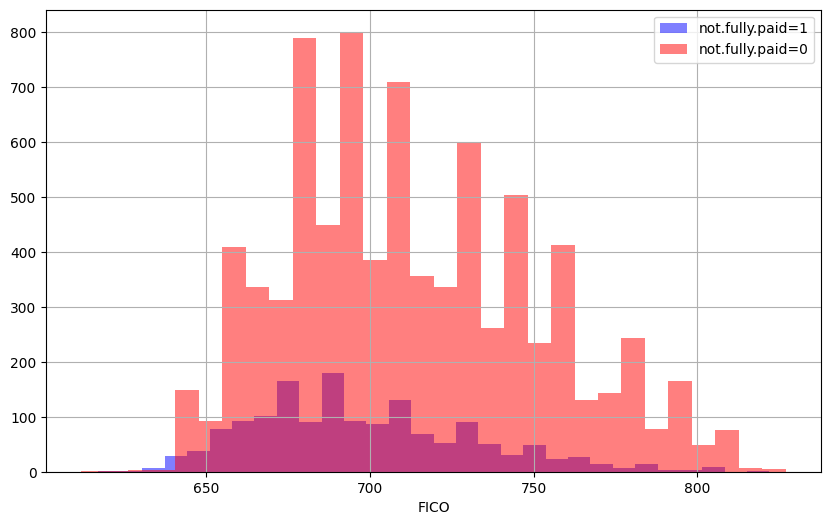

In [ ]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

**1 .FICO Scores and Debt Payment:**

The x-axis represents FICO scores, ranging from approximately 600 to 850.

The y-axis represents the count of individuals, ranging from 0 to about 800.

Two categories are represented:

“Not fully paid=1” (in red): Indicates individuals who have not fully paid their debts.

“Not fully paid=0” (in purple): Indicates individuals who have fully paid their debts.

**2. Distribution Insights:**

There are more individuals who have not fully paid their debts with FICO scores between 650 and 700.

As the FICO score increases, the number of individuals who have not fully paid decreases significantly.

**Countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.**

<Axes: xlabel='purpose', ylabel='count'>

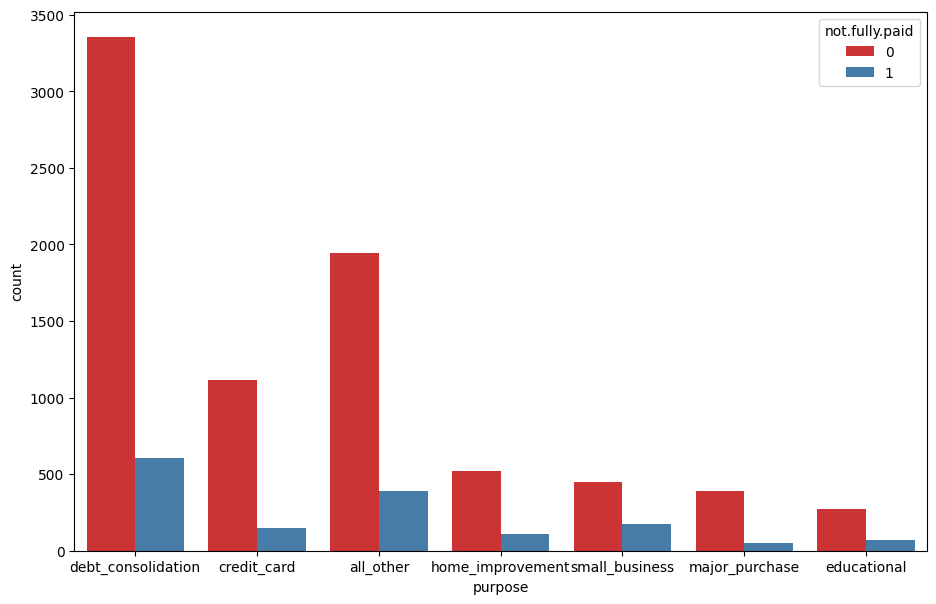

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

**1. Loan Purposes and Payment Status:**

The x-axis labels indicate the purpose of the loan:

Debt consolidation

Credit card

All other

Home improvement

Small business

Major purchase

Educational

The y-axis represents the count of individuals, ranging from 0 to about 800.

Two categories are represented:

“Not fully paid=1” (in red): Indicates individuals who have not fully paid their debts.

“Not fully paid=0” (in purple): Indicates individuals who have fully paid their debts.

**2. Distribution Insights:**

The most common purpose for which loans are taken is debt consolidation, followed by credit card and all other purposes.

A significant number of debt consolidation and credit card loans are not fully paid.

**Trend between FICO score and interest rate using jointplot.**

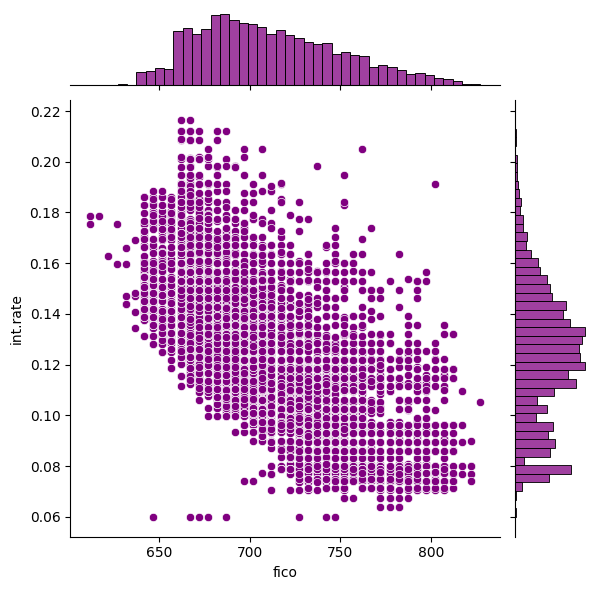

In [ ]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

**FICO Scores and Interest Rates:**

The x-axis represents FICO scores, which range from 300 to 850, with 850 considered a perfect score1.

The y-axis represents interest rates as a proportion (e.g., a rate of 11% is stored as 0.11).

As your FICO score increases, the interest rate you pay on a loan tends to decrease2.

**Jointplot Insights:**

The jointplot shows a negative correlation between FICO scores and interest rates.

Data points (represented as purple dots) are densely populated around FICO scores of 650 to 750 and interest rates of 0.10 to 0.20.

The histograms on both axes show the distribution of each variable:
Higher FICO scores are more common.

Lower interest rates are also more common.

The Pearson correlation coefficient is -0.71, indicating a significant negative correlation between the two variables2.

In summary, borrowers with higher FICO scores tend to receive loans with lower interest rates.

**lmplots to see if the trend differed between not.fully.paid and credit.policy.**

<Figure size 1100x700 with 0 Axes>

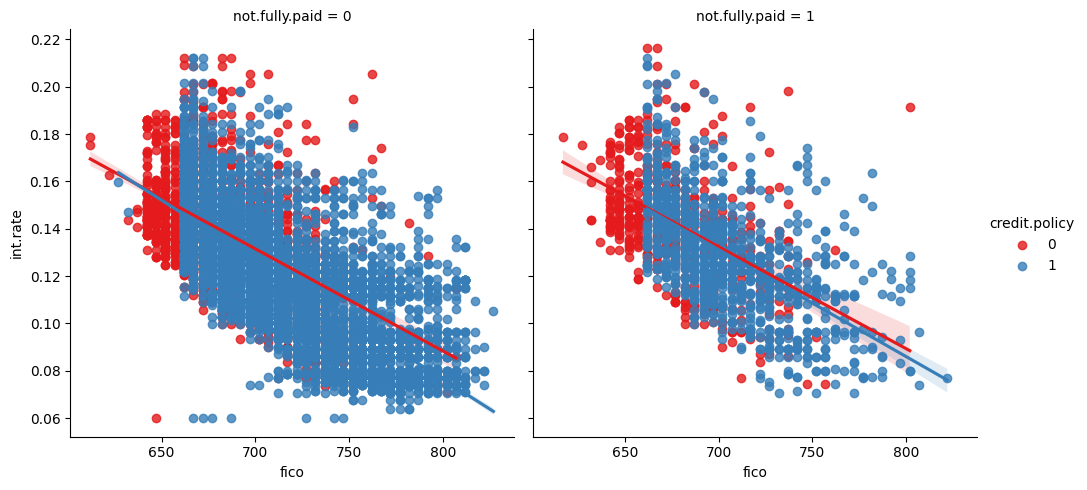

In [ ]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!


In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.


**Created a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [ ]:
cat_feats = ['purpose']

In [ ]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [ ]:
predictions_decision_tree = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions_decision_tree))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [ ]:
print(confusion_matrix(y_test,predictions_decision_tree))

[[1993  438]
 [ 342  101]]


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [ ]:
predictions_random_forest = rfc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions_random_forest))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



**Show the Confusion Matrix for the predictions.**

In [ ]:
print(confusion_matrix(y_test,predictions_random_forest))

[[2423    8]
 [ 434    9]]


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming y_test and predictions are the true labels and predicted labels for your test set
# For Decision Tree Model
accuracy_decision_tree = accuracy_score(y_test, predictions_decision_tree)

# For Random Forest Model
accuracy_random_forest = accuracy_score(y_test, predictions_random_forest)

print("Accuracy for Decision Tree Model:", accuracy_decision_tree)
print("Accuracy for Random Forest Model:", accuracy_random_forest)

Accuracy for Decision Tree Model: 0.7286012526096033
Accuracy for Random Forest Model: 0.8462073764787752


**Model Performance Metrics:**

Both models achieved relatively high accuracy scores, with the Random Forest model outperforming the Decision Tree model.

The Decision Tree Model attained an accuracy score of approximately 0.729.

The Random Forest Model achieved a higher accuracy score of approximately 0.846.

#Future Scope

Model Tuning: Fine-tune model hyperparameters and experiment with different algorithms or ensemble methods for improved performance.

Imbalanced Data Handling: Implement techniques to address class imbalance and improve model generalization.

Ensemble Learning: Leverage ensemble techniques such as stacking or boosting to combine predictions and enhance accuracy.